 ## **FinanceDataReader 란?**

한국 주식 가격, 미국주식 가격, 지수, 환율, 암호화폐 가격, 종목 리스팅 등 금융 데이터 수집 라이브러리

- FinanceData/FinanceDataReader: [Financial data reader](https://github.com/FinanceData/FinanceDataReader)

- FinanceDataReader 사용자 안내서 | [FinanceData](https://financedata.github.io/posts/finance-data-reader-users-guide.html)

- https://pandas-datareader.readthedocs.io/en/latest/readers/index.html

In [2]:
# 라이브러리 설치
!pip install -U finance-datareader

import warnings
warnings.filterwarnings('ignore')

Requirement already up-to-date: finance-datareader in c:\users\user\anaconda3\lib\site-packages (0.9.31)


In [3]:
import pandas as pd
import numpy as np

In [4]:
import FinanceDataReader as fdr
fdr.__version__

'0.9.31'

## 한국 거래소 상장 종목 전체 가져오기

In [5]:
# '?'를 통해 예제 및 도움말을 볼 수 있다.
# fdr.StockListing?
df_krx = fdr.StockListing("KRX")

In [6]:
df_krx.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


In [7]:
# csv로 저장
df_krx.to_csv("krx.csv", index=False)

In [8]:
# Symbol이 int형으로 적용되어 앞자리 0이 누락되는 경우가 발생
# ->  type을 object로 지정
df = pd.read_csv("krx.csv", dtype={"Symbol":object})
df.shape

(7213, 10)

In [9]:
df.head(2)

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시


In [10]:
# 랜덤하게 데이터 가져옴
df.sample()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
113,078930,KOSPI,GS,기타 금융업,지주회사/부동산 임대,2004-08-05,12월,"허태수, 홍순기 (각자 대표이사)",NaN,서울특별시


## 데이터 요약하기

In [11]:
# 요약 데이터 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7213 entries, 0 to 7212
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Symbol          7213 non-null   object
 1   Market          7213 non-null   object
 2   Name            7213 non-null   object
 3   Sector          2472 non-null   object
 4   Industry        2453 non-null   object
 5   ListingDate     2472 non-null   object
 6   SettleMonth     2472 non-null   object
 7   Representative  2472 non-null   object
 8   HomePage        2324 non-null   object
 9   Region          2472 non-null   object
dtypes: object(10)
memory usage: 563.6+ KB


In [12]:
# 기술 통계값
df.describe()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
count,7213,7213,7213,2472,2453,2472,2472,2472,2324,2472
unique,7213,3,7213,160,2303,1827,9,2345,2302,22
top,017480,KOSPI,KBGR29KOSPI200풋,소프트웨어 개발 및 공급업,기업인수합병,1976-06-30,12월,-,http://imt@kmaringroup.com,서울특별시
freq,1,5540,1,145,27,8,2411,5,2,1001


In [13]:
# 중복 제외한 unique값의 개수
df.nunique()

Symbol            7213
Market               3
Name              7213
Sector             160
Industry          2303
ListingDate       1827
SettleMonth          9
Representative    2345
HomePage          2302
Region              22
dtype: int64

In [14]:
# index 값
df.index

RangeIndex(start=0, stop=7213, step=1)

In [15]:
# 컬럼값 보기
df.columns

Index(['Symbol', 'Market', 'Name', 'Sector', 'Industry', 'ListingDate',
       'SettleMonth', 'Representative', 'HomePage', 'Region'],
      dtype='object')

In [16]:
# 값만 보기
df.values

array([['060310', 'KOSDAQ', '3S', ..., '박종익, 김세완 (각자 대표이사)',
        'http://www.3sref.com', '서울특별시'],
       ['095570', 'KOSPI', 'AJ네트웍스', ..., '박대현',
        'http://www.ajnet.co.kr', '서울특별시'],
       ['006840', 'KOSPI', 'AK홀딩스', ..., '채형석, 이석주(각자 대표이사)',
        'http://www.aekyunggroup.co.kr', '서울특별시'],
       ...,
       ['003280', 'KOSPI', '흥아해운', ..., '이환구', 'http://www.heung-a.com',
        '서울특별시'],
       ['037440', 'KOSDAQ', '희림', ..., '정영균, 이목운, 허철호 (각자대표)',
        'http://www.heerim.com', '서울특별시'],
       ['238490', 'KOSDAQ', '힘스', ..., '김주환', 'http://www.hims.co.kr',
        '인천광역시']], dtype=object)

## 데이터 색인하기

In [17]:
# 컬럼 하나만 가져오기 - Series
print(df["Name"])
print(type(df["Name"]))

0            3S
1        AJ네트웍스
2         AK홀딩스
3        APS홀딩스
4         AP시스템
         ...   
7208    흥국화재2우B
7209      흥국화재우
7210       흥아해운
7211         희림
7212         힘스
Name: Name, Length: 7213, dtype: object
<class 'pandas.core.series.Series'>


In [18]:
# 특정 행 가져오기
print(df.loc[0])
print(type(df.loc[0]))

Symbol                          060310
Market                          KOSDAQ
Name                                3S
Sector                        전자부품 제조업
Industry                   반도체 웨이퍼 캐리어
ListingDate                 2002-04-23
SettleMonth                        03월
Representative      박종익, 김세완 (각자 대표이사)
HomePage          http://www.3sref.com
Region                           서울특별시
Name: 0, dtype: object
<class 'pandas.core.series.Series'>


In [19]:
type(df)

pandas.core.frame.DataFrame

In [20]:
# 여러 컬럼 가져오기
# 대괄호가 2개면 2차원 행렬이라고 이해할 수 있음
df[["Symbol", "Name"]]

,Symbol,Name
0,060310,3S
1,095570,AJ네트웍스
2,006840,AK홀딩스
3,054620,APS홀딩스
4,265520,AP시스템
...,...,...
7208,000547,흥국화재2우B
7209,000545,흥국화재우
7210,003280,흥아해운
7211,037440,희림


In [21]:
df.loc[[0, 1, 5]]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시
5,211270,KOSDAQ,AP위성,통신 및 방송 장비 제조업,위성통신 단말기,2016-03-04,12월,류장수,http://www.apsi.co.kr,서울특별시


In [22]:
# 특정 컬럼 가져오기
print(df[["Name"]])
print(type(df[["Name"]]))

         Name
0          3S
1      AJ네트웍스
2       AK홀딩스
3      APS홀딩스
4       AP시스템
...       ...
7208  흥국화재2우B
7209    흥국화재우
7210     흥아해운
7211       희림
7212       힘스

[7213 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>


In [23]:
# 행과 열 함께 가져오기
df.loc[1, "Name"]

'AJ네트웍스'

In [24]:
%timeit df.loc[2, "Name"]

6.76 µs ± 257 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [25]:
%timeit df.loc[2]["Name"]

70.5 µs ± 2.26 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [26]:
# 여러 행과 여러 컬럼 가져오기
df.loc[[0, 1, 2], ["Name", "Symbol"]]

,Name,Symbol
0,3S,060310
1,AJ네트웍스,095570
2,AK홀딩스,006840


## Boolean Indexing

In [27]:
df[df["Name"] =="카카오"]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
5197,035720,KOSPI,카카오,"자료처리, 호스팅, 포털 및 기타 인터넷 정보매개 서비스업",인터넷 서비스(인터넷 광고),2017-07-10,12월,"여민수, 조수용",http://www.kakaocorp.com,제주특별자치도


In [28]:
# .loc[행, 열]
# ,loc[조건식, 열]

df.loc[(df["Region"] == "서울특별시") & (df["Market"] == "KOSPI"), ["Symbol", "Name"]]

seoul = df["Region"] == "서울특별시"
kospi = df["Market"] == "KOSPI"
df.loc[(seoul & kospi), ["Symbol","Name"]]

,Symbol,Name
1,095570,AJ네트웍스
2,006840,AK홀딩스
48,027410,BGF
49,282330,BGF리테일
51,001460,BYC
...,...,...
7195,079980,휴비스
7198,005010,휴스틸
7203,069260,휴켐스
7207,000540,흥국화재


## 파생변수 만들기

In [29]:
# Object type
df["ListingDate"]

0       2002-04-23
1       2015-08-21
2       1999-08-11
3       2001-12-04
4       2017-04-07
           ...    
7208           NaN
7209           NaN
7210    1976-06-29
7211    2000-02-03
7212    2017-07-20
Name: ListingDate, Length: 7213, dtype: object

In [30]:
# datetime type
df["ListingDate"] = pd.to_datetime(df["ListingDate"])
df["ListingDate"]

0      2002-04-23
1      2015-08-21
2      1999-08-11
3      2001-12-04
4      2017-04-07
          ...    
7208          NaT
7209          NaT
7210   1976-06-29
7211   2000-02-03
7212   2017-07-20
Name: ListingDate, Length: 7213, dtype: datetime64[ns]

In [31]:
# 연도 추출 파생변수
df["ListingYear"] = df["ListingDate"].dt.year
df["ListingYear"].tail(5)

7208       NaN
7209       NaN
7210    1976.0
7211    2000.0
7212    2017.0
Name: ListingYear, dtype: float64

In [32]:
# NaN값(=np.nan)이 float type이고 ListingYear에 NaN값이 존재하기 때문에 float이다.
df[["ListingDate","ListingYear"]].dtypes

ListingDate    datetime64[ns]
ListingYear           float64
dtype: object

## 데이터 시각화 툴

### matplotlib
* [Anatomy of a figure — Matplotlib documentation](https://matplotlib.org/3.1.1/gallery/showcase/anatomy.html)

### seaborn
* [seaborn: statistical data visualization — seaborn documentation](https://seaborn.pydata.org/index.html)

### pandas
* [Visualization — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
# 폰트 설정
plt.rc("font", family="Malgun Gothic")
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)
# ggplot으로 그래프 스타일 설정
plt.style.use("ggplot")
# 그래프에 retina display 적용 (글씨 선명하게.. retina를 제공하는 display에서만 적용됨)
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

<AxesSubplot:title={'center':'한글폰트'}>

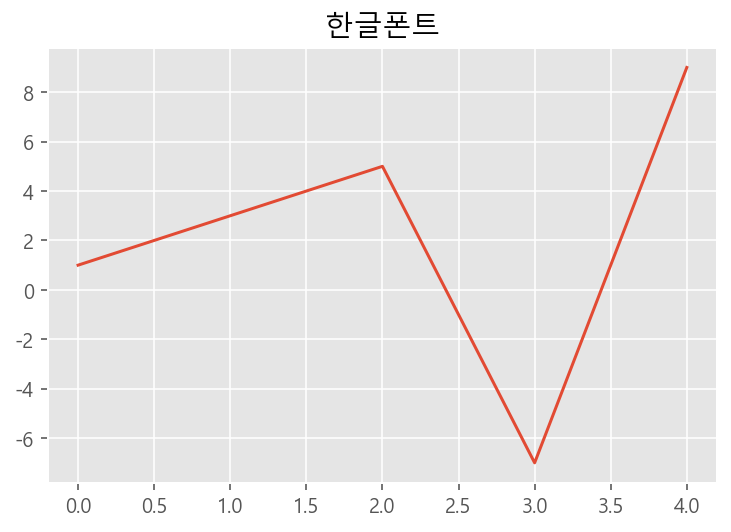

In [34]:
pd.Series([1, 3, 5, -7, 9]).plot(title="한글폰트")

## 한 개의 변수 빈도수 구하고 시각화 하기

In [35]:
df["Market"].unique()

array(['KOSDAQ', 'KOSPI', 'KONEX'], dtype=object)

In [36]:
# 빈도수 구하기 value_counts()
df["Market"].value_counts()

KOSPI     5540
KOSDAQ    1540
KONEX      133
Name: Market, dtype: int64

In [37]:
# 파생상품 제외한 종목 개수
df[df["Sector"].isnull() == False]["Market"].value_counts()

KOSDAQ    1519
KOSPI      820
KONEX      133
Name: Market, dtype: int64

<AxesSubplot:>

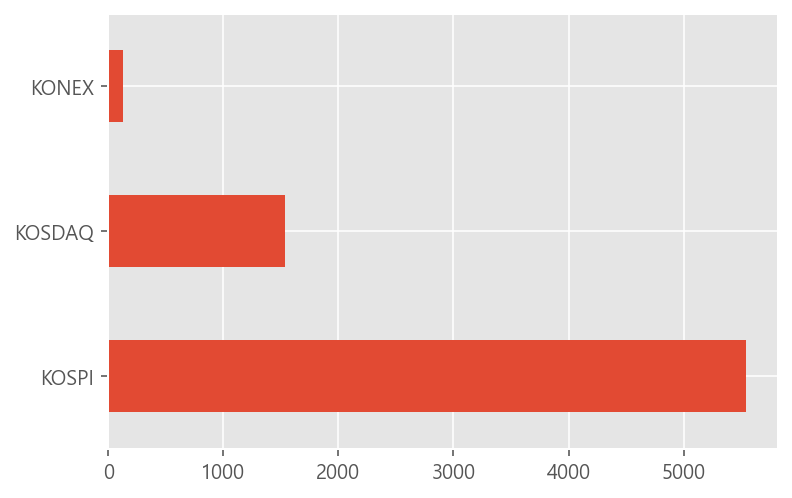

In [38]:
df["Market"].value_counts().plot.barh()

<AxesSubplot:xlabel='count', ylabel='Market'>

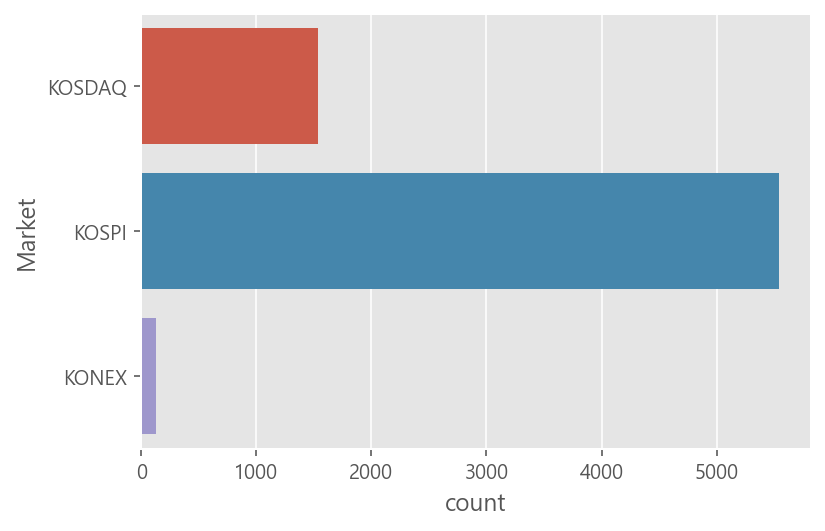

In [39]:
sns.countplot(data=df, y='Market')

### Sector 상위 30개 종목의 count 그래프

In [40]:
sector_top = df["Sector"].value_counts().head(30)

In [41]:
sector_30 = df[df["Sector"].isin(sector_top.index)]

In [42]:
print(plt.colormaps())

['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r',

Text(0.5, 1.0, '섹터별 빈도수')

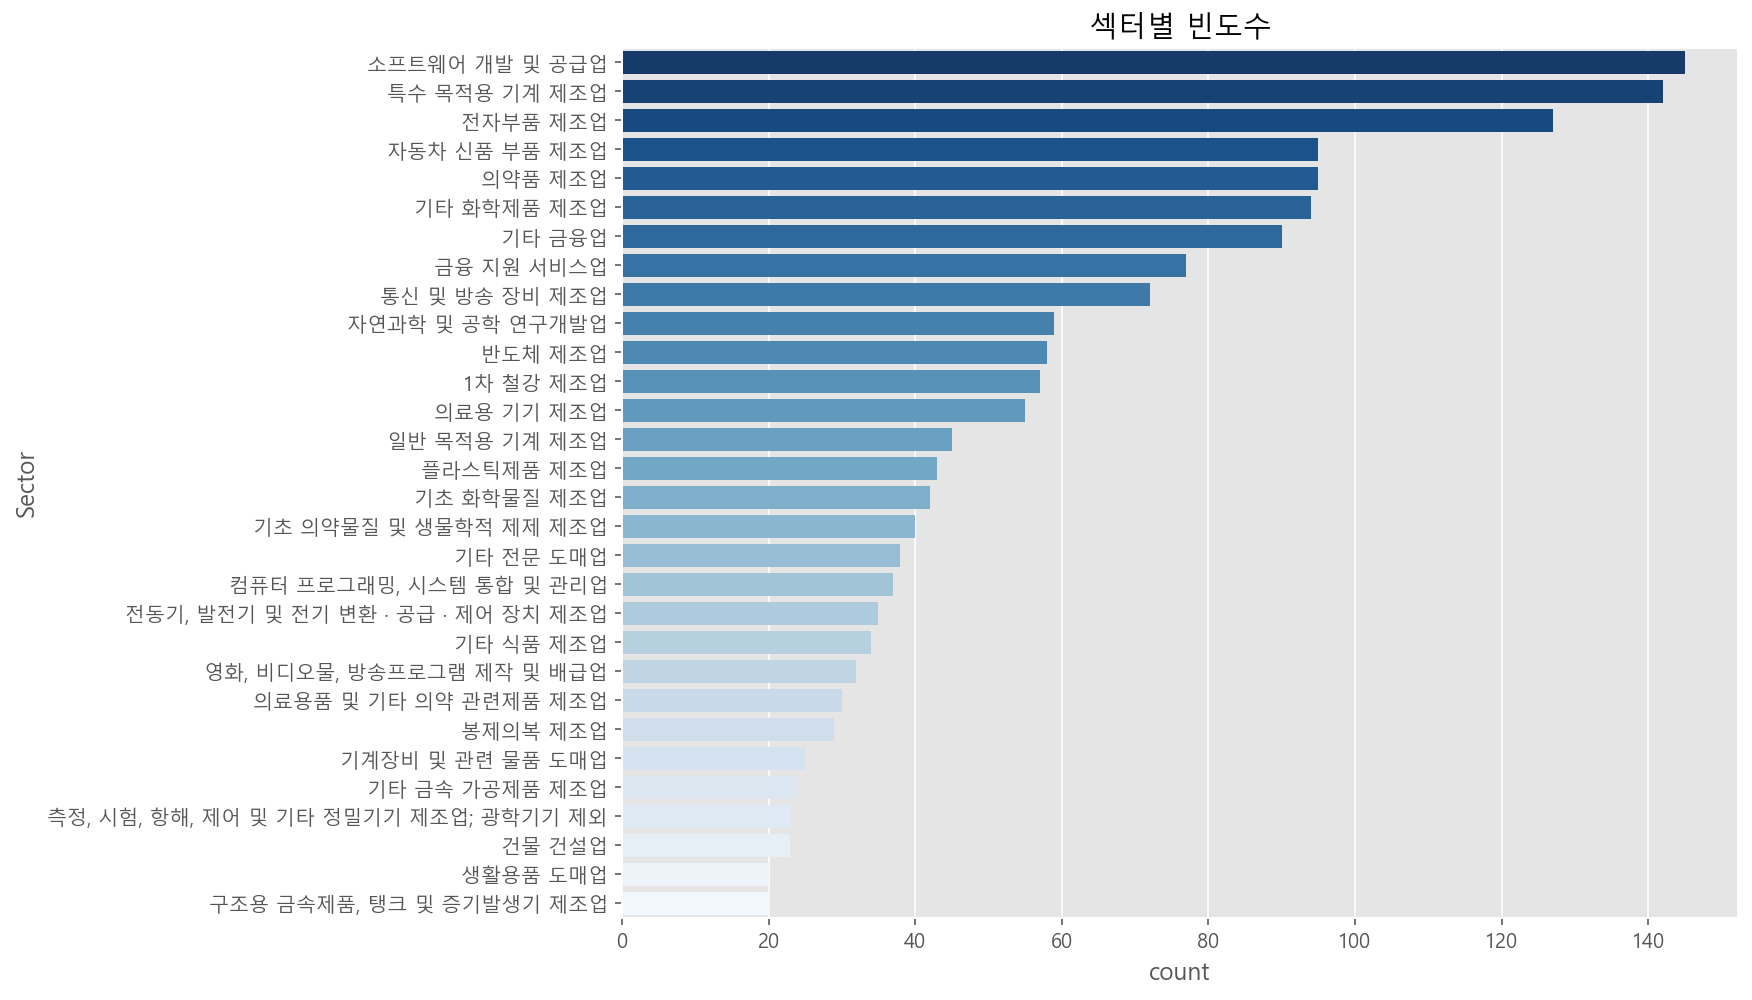

In [43]:
plt.figure(figsize=(10,8))
sns.countplot(data=sector_30, y='Sector', palette="Blues_r",
              order=sector_top.index).set_title("섹터별 빈도수")

### Industry 빈도수 그래프

In [44]:
industry_top30 = df["Industry"].value_counts().head(30)

In [45]:
industry_30_count = df[df["Industry"].isin(industry_top30.index)]

Text(0.5, 1.0, '산업별 빈도수')

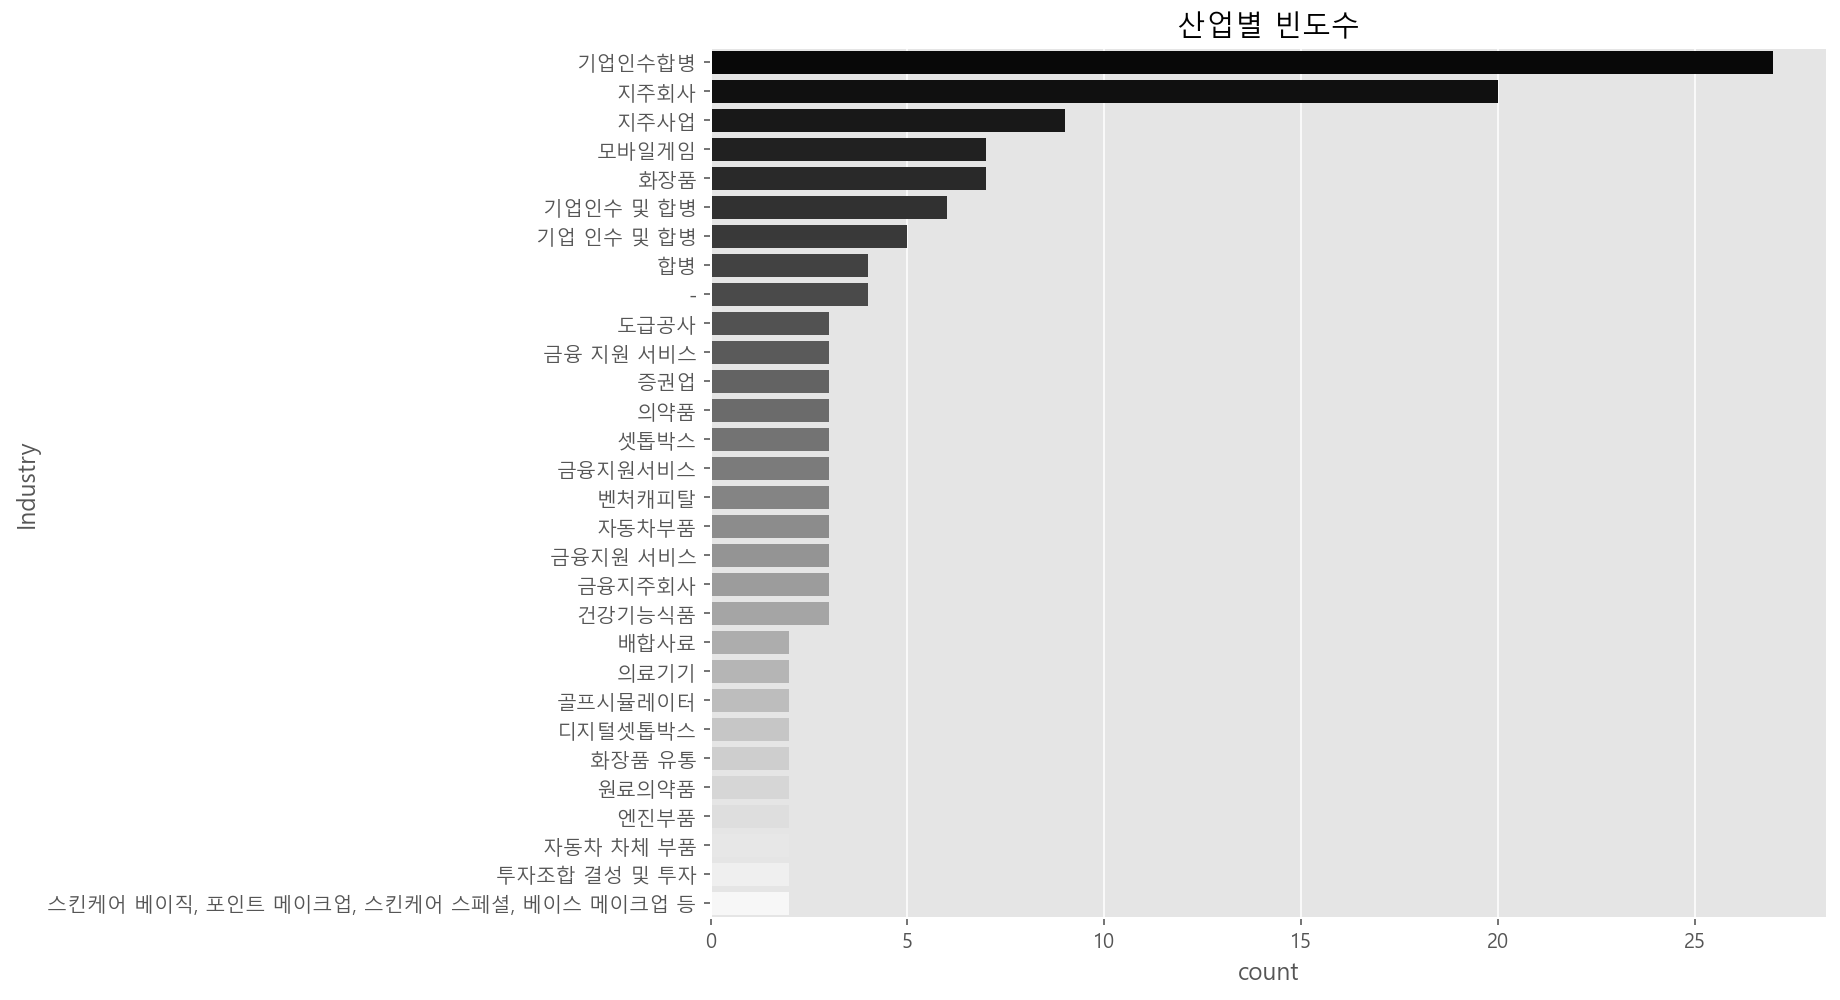

In [46]:
plt.figure(figsize=(10,8))
sns.countplot(data=industry_30_count, y="Industry", palette="gray",
             order=industry_top30.index).set_title("산업별 빈도수")

<AxesSubplot:title={'center':'Industry Count'}>

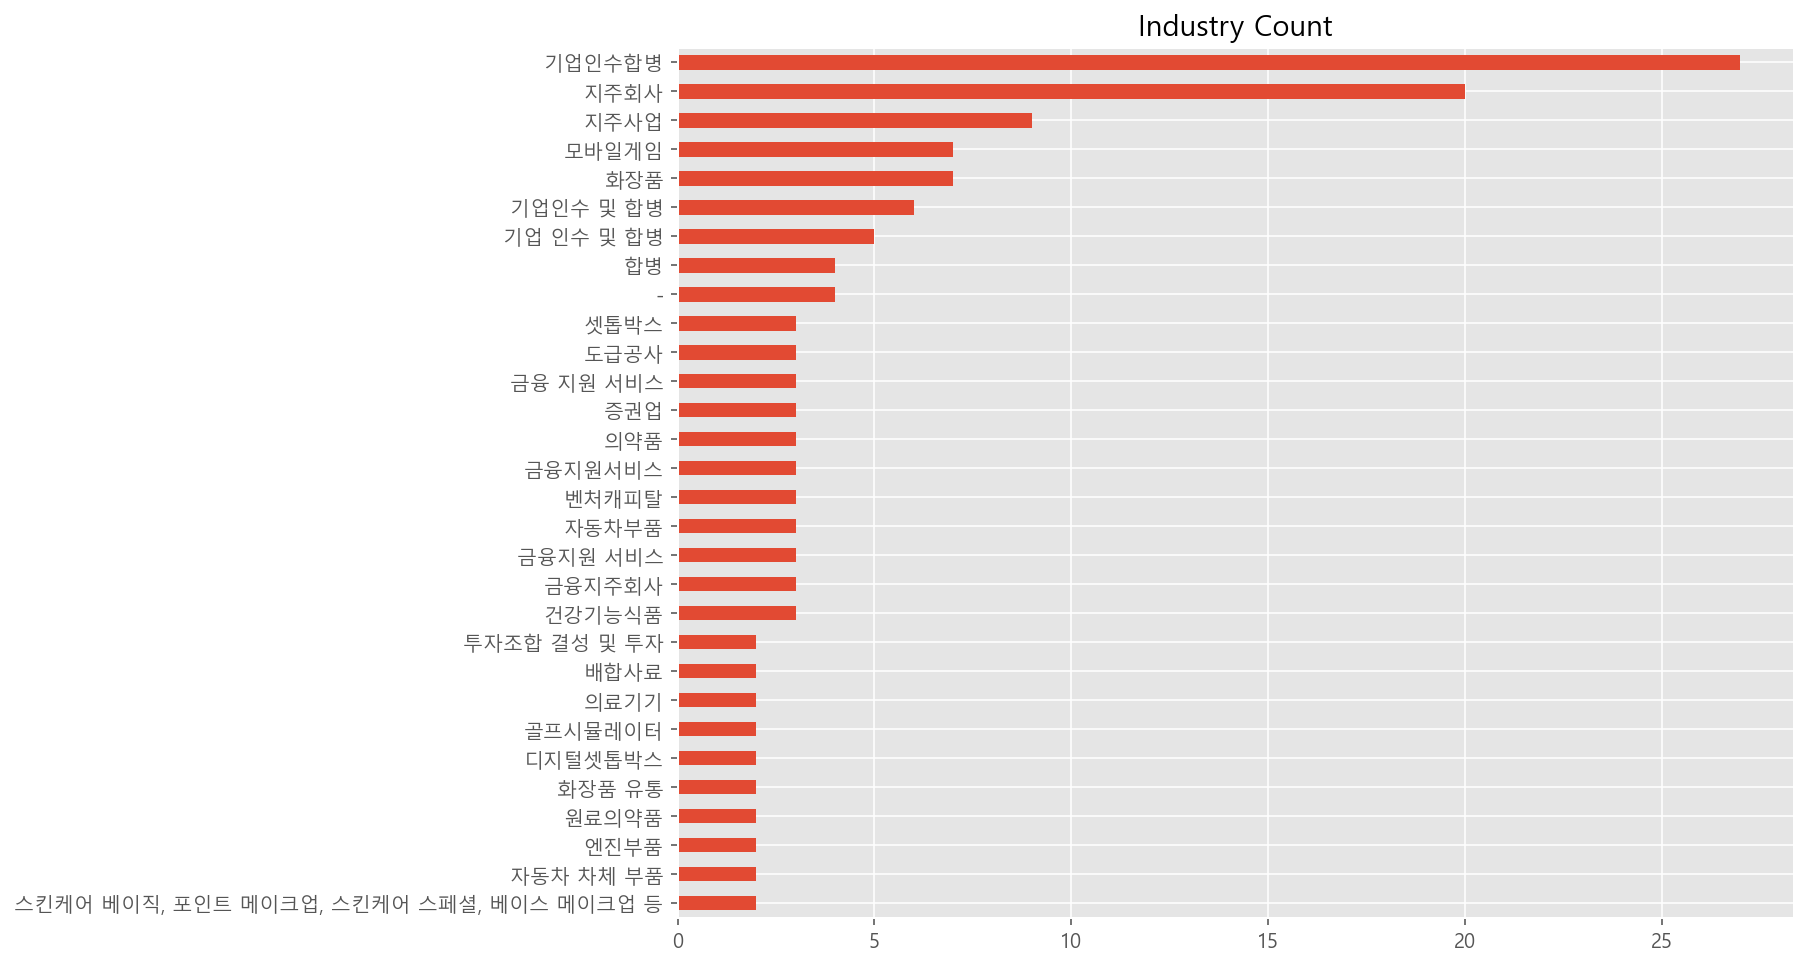

In [47]:
industry_top30.sort_values().plot.barh(figsize=(10, 8), title="Industry Count")

### Region 별 빈도수

<AxesSubplot:title={'center':'지역별 상장종목 수'}>

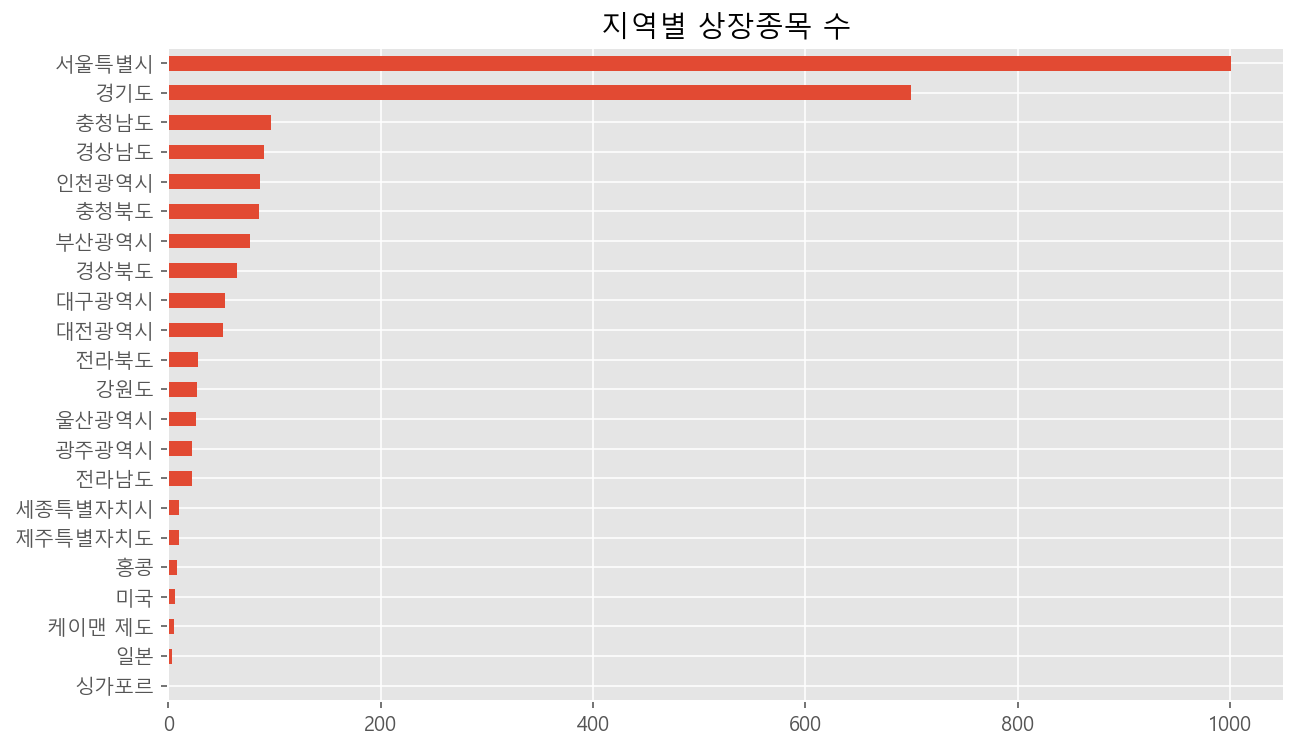

In [48]:
df["Region"].value_counts().sort_values().plot.barh(
    figsize=(10,6), title="지역별 상장종목 수")

Text(0.5, 1.0, 'Region Count')

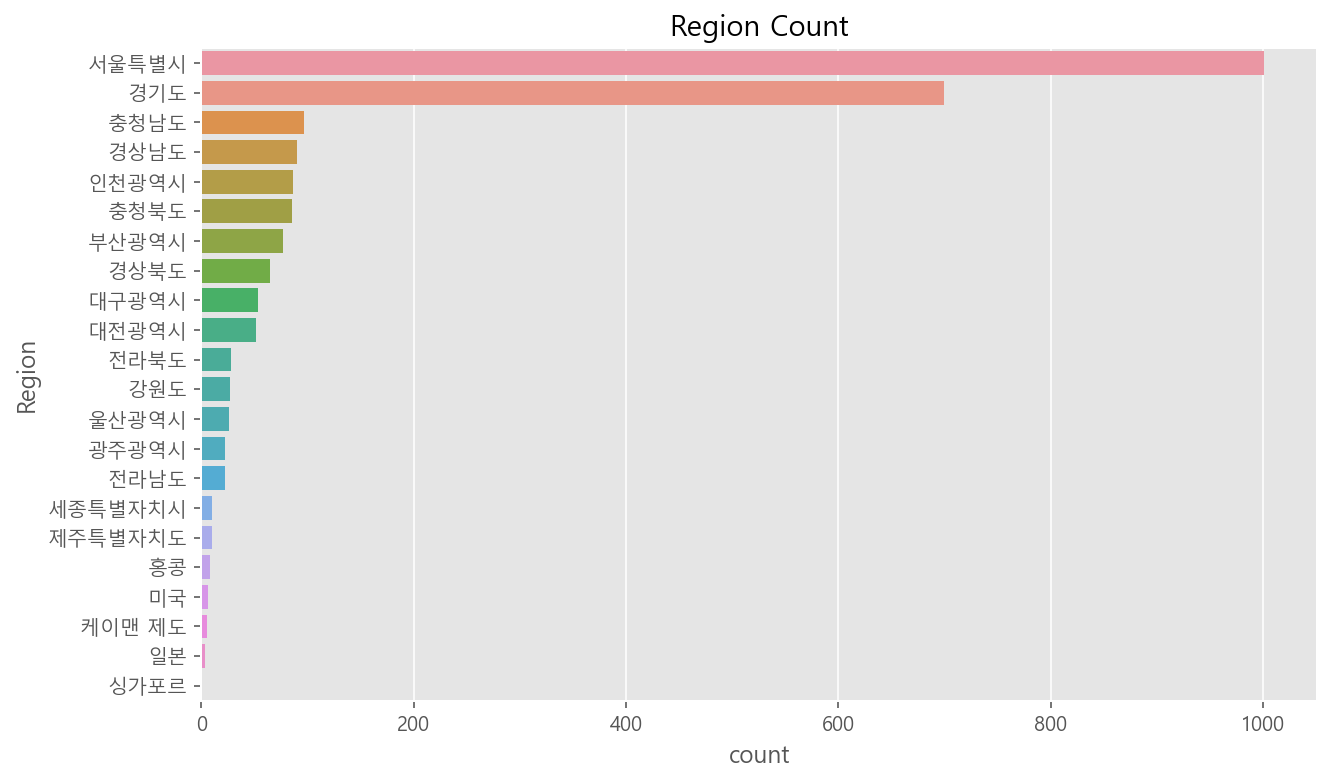

In [49]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, y="Region", 
              order=df["Region"].value_counts().index).set_title("Region Count")

## 두개의 변수 빈도수 시각화

In [50]:
pd.crosstab(df["Market"], df["Region"])

Region,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,미국,부산광역시,서울특별시,...,울산광역시,인천광역시,일본,전라남도,전라북도,제주특별자치도,충청남도,충청북도,케이맨 제도,홍콩
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,7,34,1,5,4,1,7,0,2,50,...,0,4,0,3,1,1,3,9,0,0
KOSDAQ,16,514,47,40,9,31,37,6,39,535,...,9,57,3,12,15,2,68,61,4,8
KOSPI,4,151,42,20,9,21,7,0,36,416,...,17,25,0,7,12,7,26,15,1,0


Text(0.5, 1.0, '마켓별 지역별 빈도수')

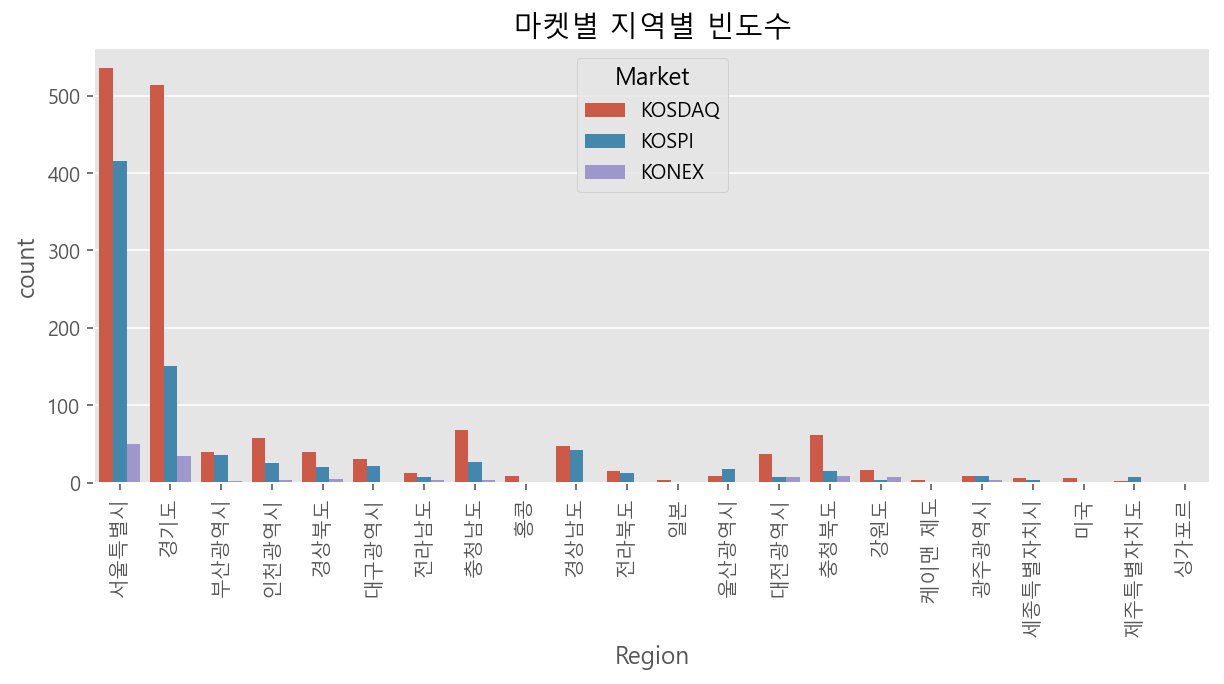

In [51]:
plt.figure(figsize=(10,4))
plt.xticks(rotation=90)
sns.countplot(data=df, x="Region", hue="Market").set_title("마켓별 지역별 빈도수")

In [52]:
# 연도별 상장 종목 빈도수
market_year = pd.crosstab(df["Market"], df["ListingYear"])
market_year

ListingYear,1956.0,1962.0,1964.0,1966.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,0,0,0,0,0,0,0,0,0,0,...,0,12,12,26,23,16,14,15,11,4
KOSDAQ,0,0,0,0,0,0,0,0,0,0,...,18,35,58,89,62,68,85,97,86,81
KOSPI,5,1,1,1,6,5,4,1,3,22,...,14,11,9,18,18,20,19,15,14,22


<AxesSubplot:xlabel='ListingYear', ylabel='count'>

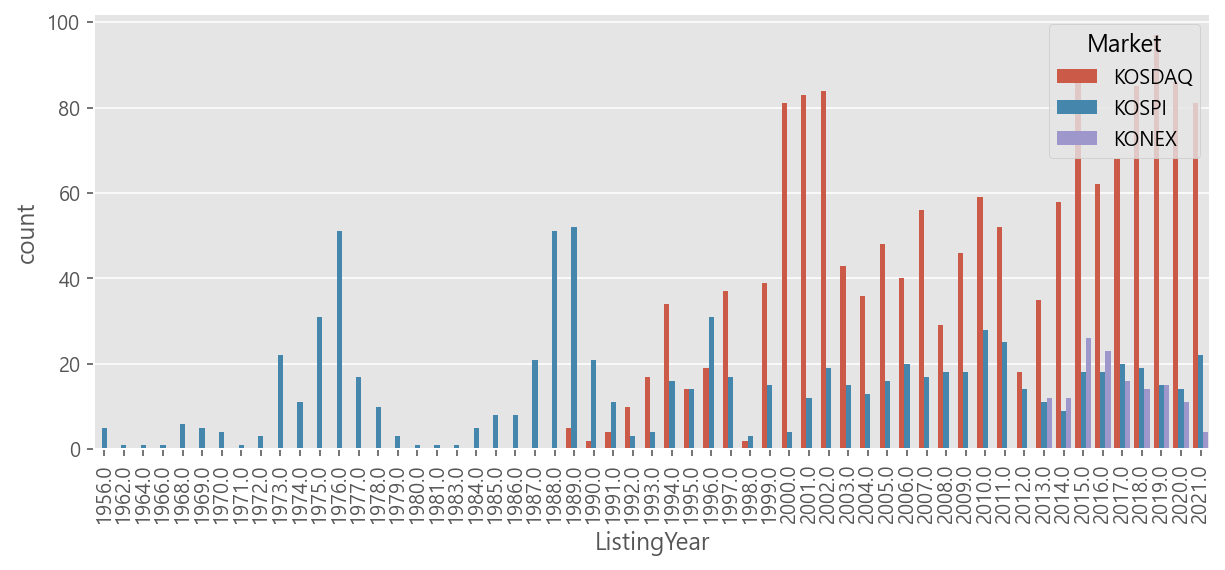

In [53]:
plt.figure(figsize=(10,4))
plt.xticks(rotation=90)
sns.countplot(data=df, x="ListingYear", hue="Market")

<AxesSubplot:title={'center':'연도별 상장 종목 수'}, xlabel='ListingYear'>

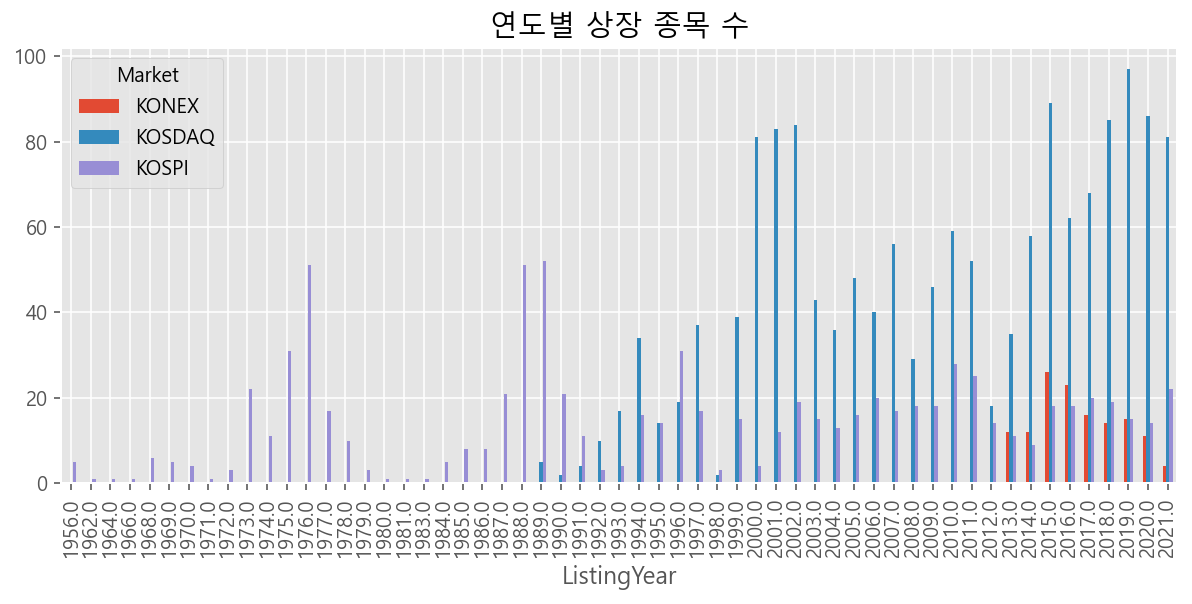

In [54]:
market_year.T.plot.bar(figsize=(10,4), title="연도별 상장 종목 수")

array([<AxesSubplot:title={'center':'KONEX'}, xlabel='ListingYear'>,
       <AxesSubplot:title={'center':'KOSDAQ'}, xlabel='ListingYear'>,
       <AxesSubplot:title={'center':'KOSPI'}, xlabel='ListingYear'>],
      dtype=object)

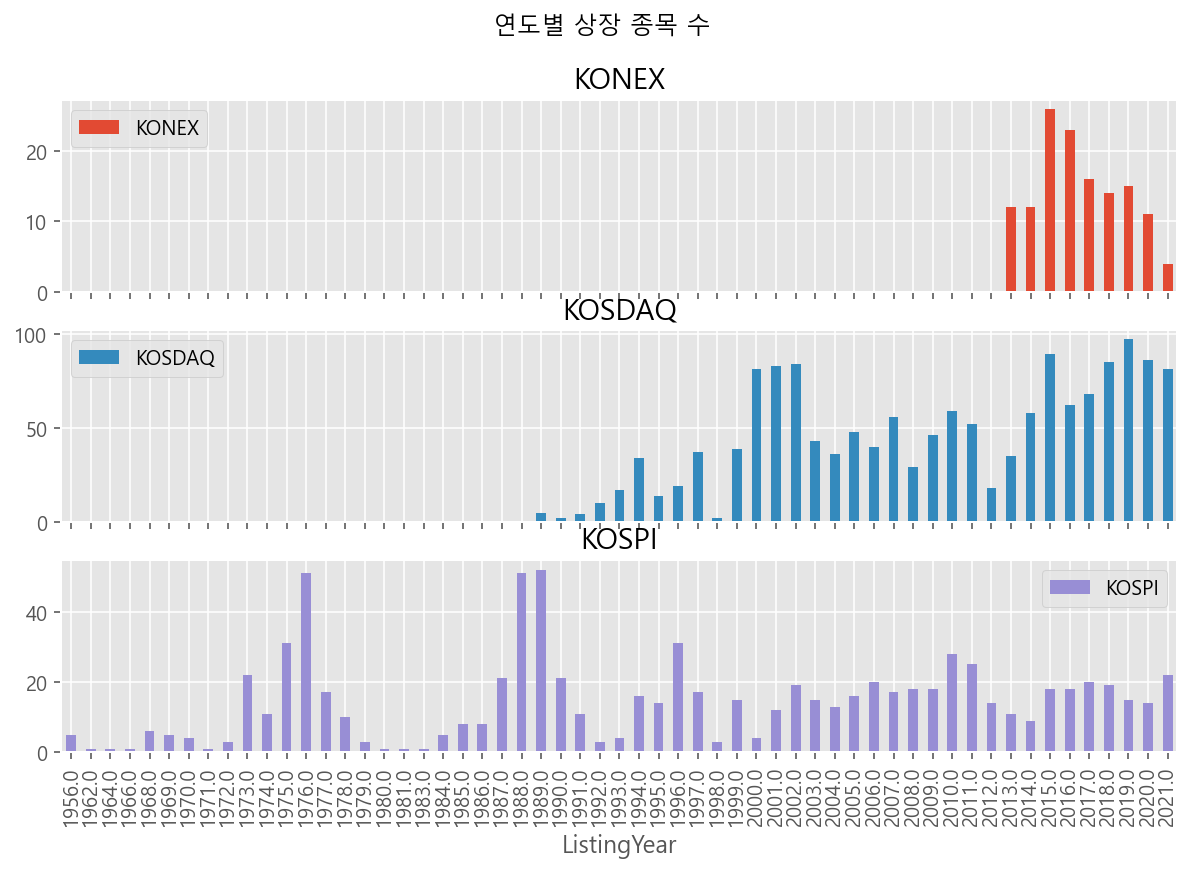

In [55]:
market_year.T.plot.bar(figsize=(10,6), 
                       title="연도별 상장 종목 수",
                       subplots=True)

In [56]:
market_year.columns = market_year.columns.astype(int)
market_year

ListingYear,1956,1962,1964,1966,1968,1969,1970,1971,1972,1973,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,0,0,0,0,0,0,0,0,0,0,...,0,12,12,26,23,16,14,15,11,4
KOSDAQ,0,0,0,0,0,0,0,0,0,0,...,18,35,58,89,62,68,85,97,86,81
KOSPI,5,1,1,1,6,5,4,1,3,22,...,14,11,9,18,18,20,19,15,14,22


array([<AxesSubplot:title={'center':'KONEX'}, xlabel='ListingYear'>,
       <AxesSubplot:title={'center':'KOSDAQ'}, xlabel='ListingYear'>,
       <AxesSubplot:title={'center':'KOSPI'}, xlabel='ListingYear'>],
      dtype=object)

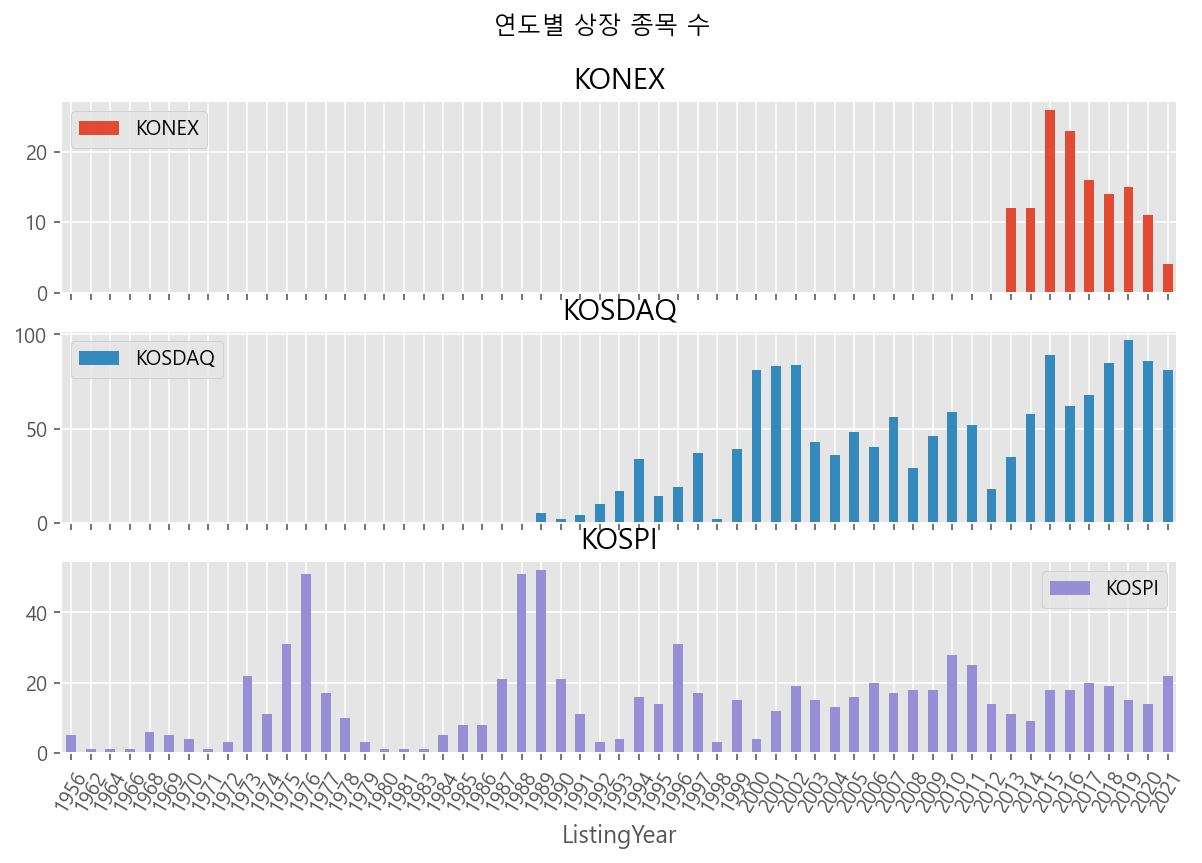

In [57]:
market_year.T.plot.bar(figsize=(10,6), 
                       title="연도별 상장 종목 수",
                       subplots=True, rot=60)

In [58]:
# groupby 연산
# unstack() -> dataframe 형태로 변환
df.groupby(["Market","ListingYear"])["Symbol"].count().unstack().fillna(0).astype(int)

ListingYear,1956.0,1962.0,1964.0,1966.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,0,0,0,0,0,0,0,0,0,0,...,0,12,12,26,23,16,14,15,11,4
KOSDAQ,0,0,0,0,0,0,0,0,0,0,...,18,35,58,89,62,68,85,97,86,81
KOSPI,5,1,1,1,6,5,4,1,3,22,...,14,11,9,18,18,20,19,15,14,22


In [59]:
# pivot_table 연산
pd.pivot_table(data=df, index="Market", columns="ListingYear",
               values="Symbol", aggfunc="count", fill_value=0)

ListingYear,1956.0,1962.0,1964.0,1966.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,0,0,0,0,0,0,0,0,0,0,...,0,12,12,26,23,16,14,15,11,4
KOSDAQ,0,0,0,0,0,0,0,0,0,0,...,18,35,58,89,62,68,85,97,86,81
KOSPI,5,1,1,1,6,5,4,1,3,22,...,14,11,9,18,18,20,19,15,14,22


In [60]:
# groupby를 직관화 시킨게 pivot table
# pivot table을 사용하기 더 쉽게 만든게 croostab
pd.crosstab(df["Market"], df["ListingYear"])

ListingYear,1956.0,1962.0,1964.0,1966.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,0,0,0,0,0,0,0,0,0,0,...,0,12,12,26,23,16,14,15,11,4
KOSDAQ,0,0,0,0,0,0,0,0,0,0,...,18,35,58,89,62,68,85,97,86,81
KOSPI,5,1,1,1,6,5,4,1,3,22,...,14,11,9,18,18,20,19,15,14,22


In [61]:
market_year = df.groupby(["Market", "ListingYear"])["Symbol"].count()

In [62]:
df_market_year = market_year.reset_index()
df_market_year = df_market_year.rename(columns={"Symbol":"count"})
df_market_year

,Market,ListingYear,count
0,KONEX,2013.0,12
1,KONEX,2014.0,12
2,KONEX,2015.0,26
3,KONEX,2016.0,23
4,KONEX,2017.0,16
...,...,...,...
94,KOSPI,2017.0,20
95,KOSPI,2018.0,19
96,KOSPI,2019.0,15
97,KOSPI,2020.0,14


<AxesSubplot:xlabel='ListingYear', ylabel='count'>

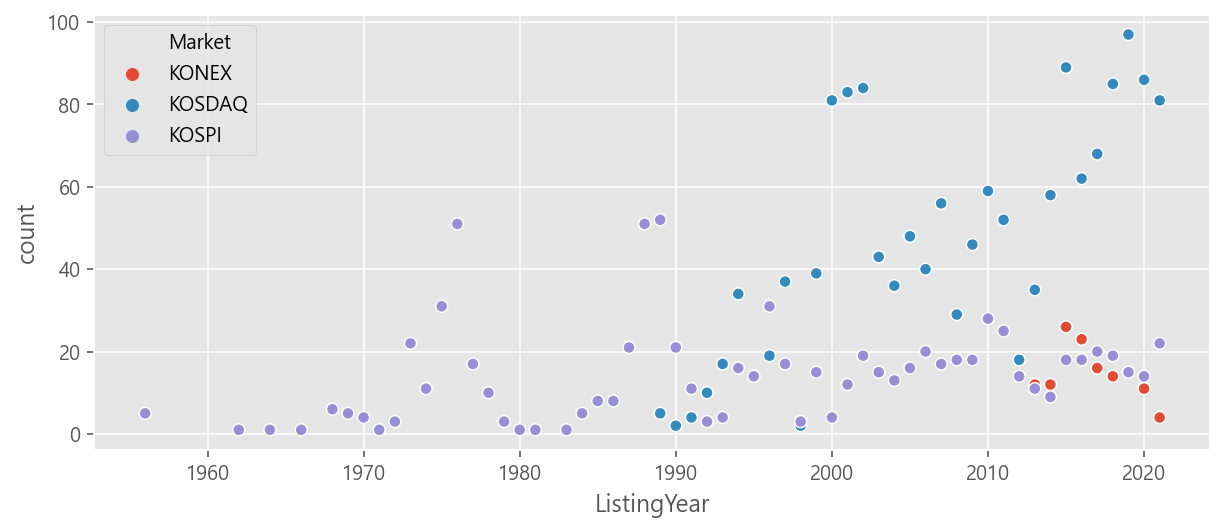

In [63]:
# scatterplot
plt.figure(figsize=(10,4))
sns.scatterplot(data=df_market_year, x="ListingYear", y="count", hue="Market")

<AxesSubplot:xlabel='ListingYear', ylabel='count'>

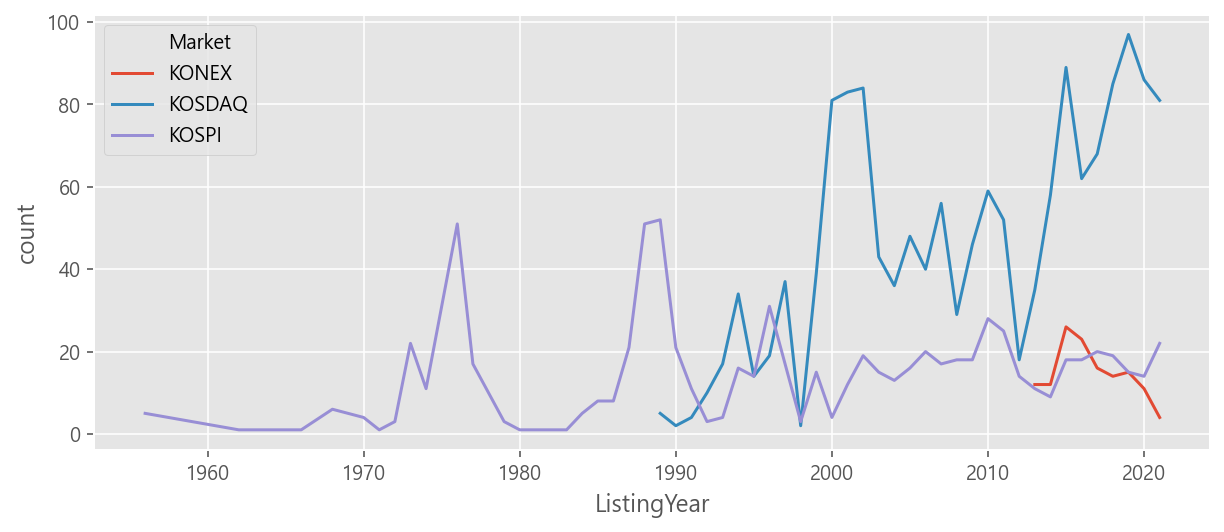

In [64]:
# lineplot 그리기
# ci : 신뢰구간 표시, None으로 지정해주면 좀 더 빠르게 그래프를 나타낸다.
plt.figure(figsize=(10,4))
sns.lineplot(data=df_market_year, x="ListingYear", y="count", hue="Market", ci=None)

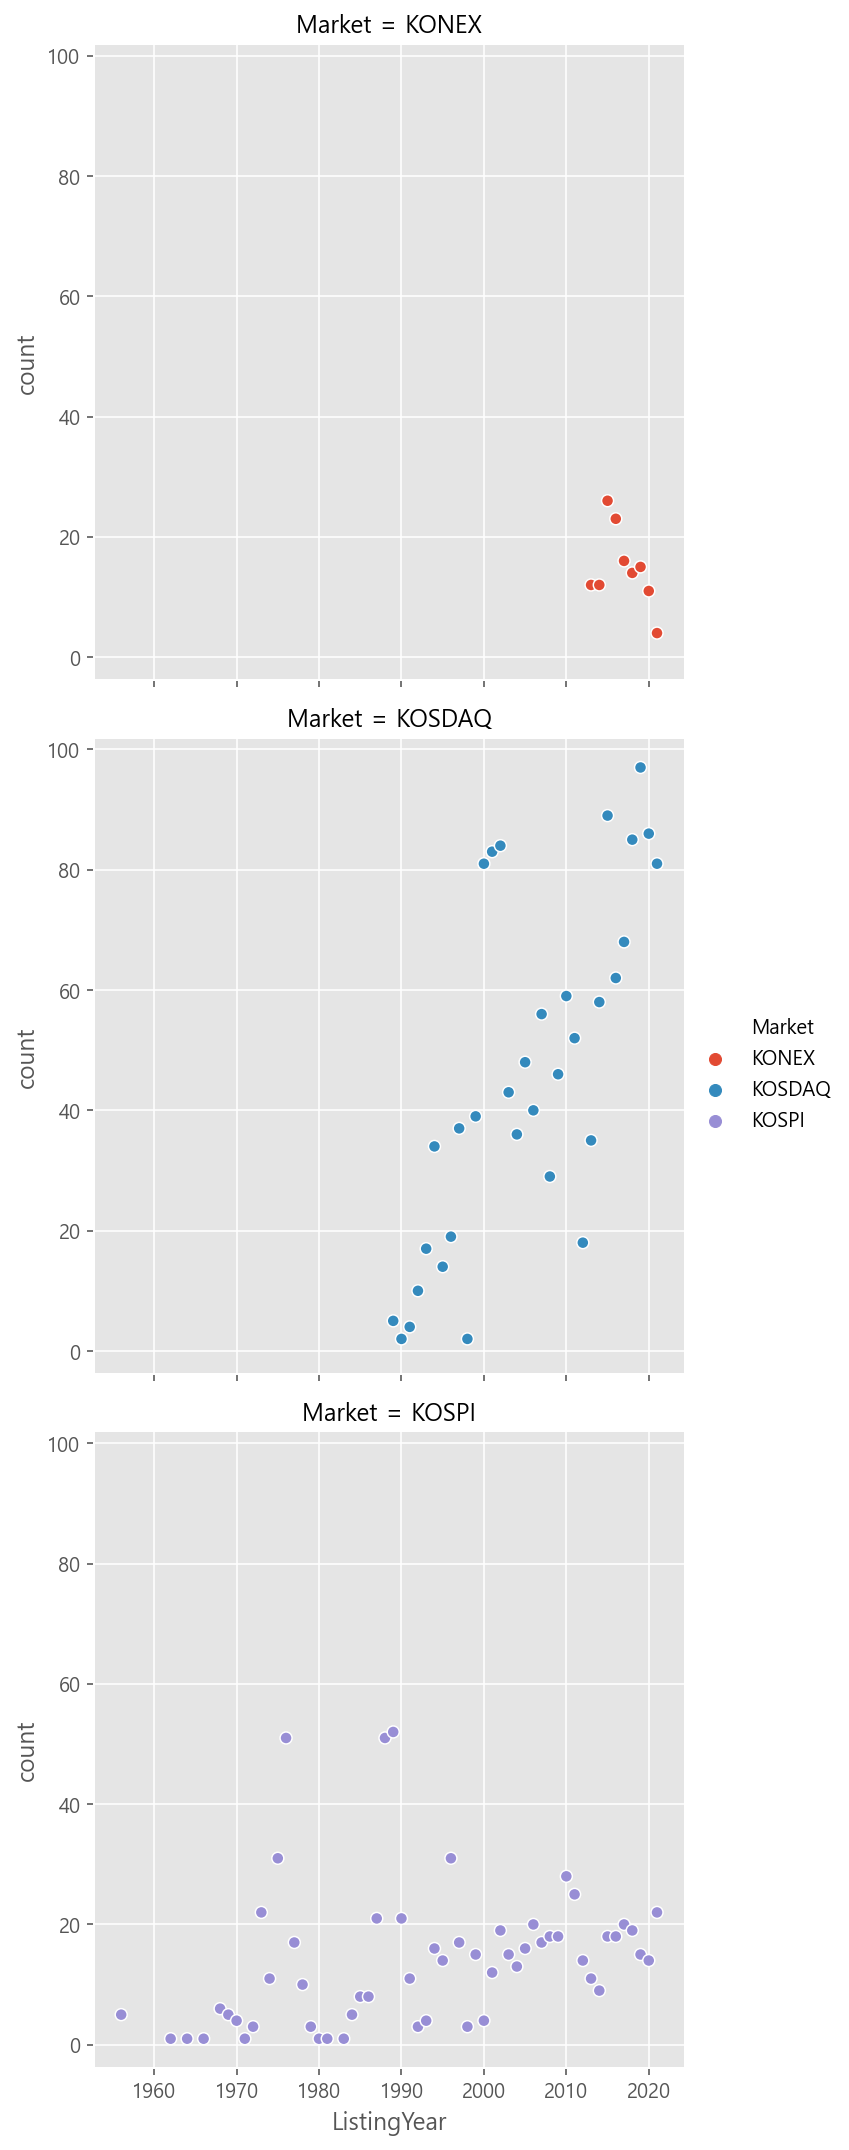

In [65]:
# relplot은 기존 scatter / line(연속된 수치데이터) + subplot을 지정하는 기능 (col, row)
sns.relplot(data=df_market_year, x="ListingYear", y="count", hue="Market",  row="Market")

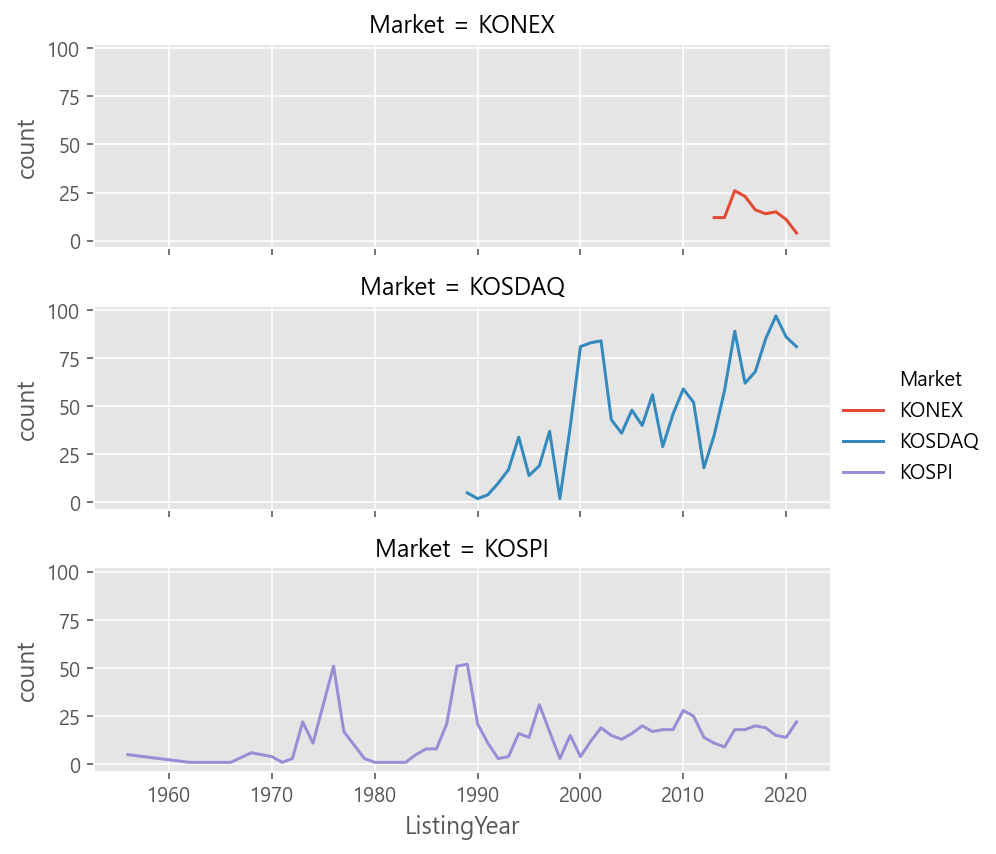

In [66]:
# replot은 figsize로 크기 조절 x , height, aspect 파라미터 지정
sns.relplot(kind="line", data=df_market_year, 
            x="ListingYear", y="count", hue="Market",  row="Market",
            height=2, aspect=3)

## 히스토그램
* 수치형 데이터를 범주형 데이터로 표현

<AxesSubplot:ylabel='Frequency'>

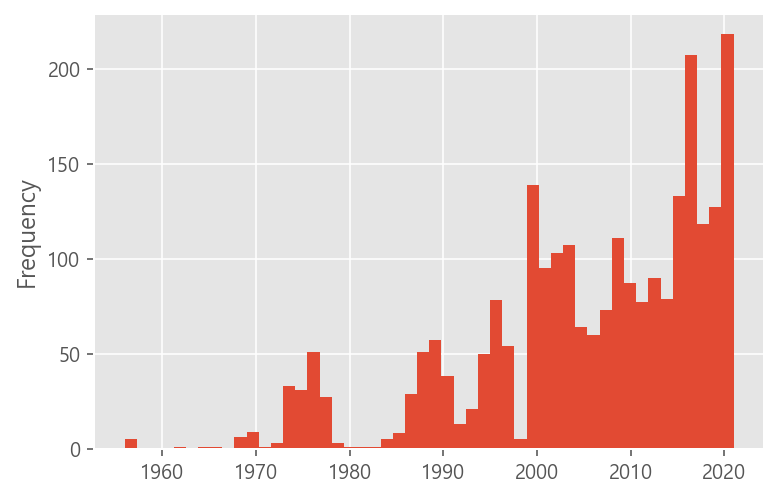

In [75]:
# bin 값에 따라 구간이 달라짐
df["ListingYear"].plot.hist(bins=50)

<AxesSubplot:ylabel='Density'>

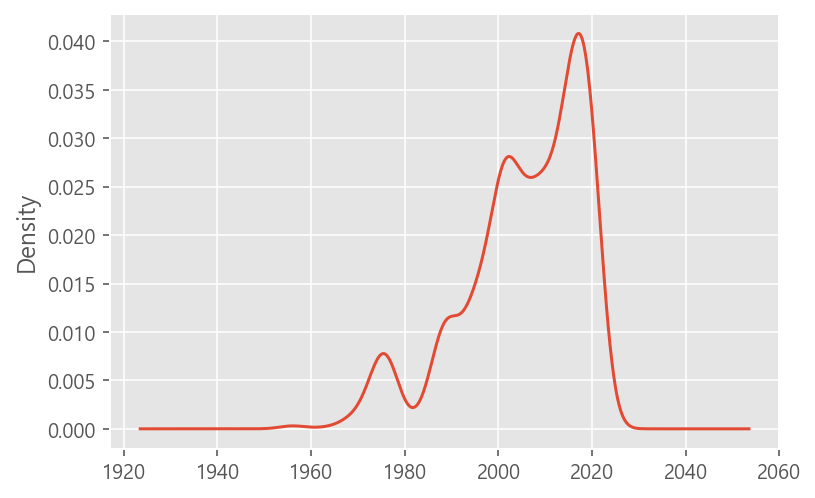

In [76]:
df["ListingYear"].plot.kde()

## 데이터 색인

In [79]:
df[df["Region"] =="케이맨 제도"]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,ListingYear
2126,900280,KOSDAQ,골든센츄리,기타 금융업,트랙터용 휠 및 타이어,2016-10-19,12월,주승화,http://www.jsj-wheel.co.kr,케이맨 제도,2016.0
2159,900070,KOSDAQ,글로벌에스엠,기타 금융업,"자회사 제품 : IT기기용 정밀 화스너부품(스크류, 샤프트, 스프링)",2009-12-23,12월,나윤복,http://www.globalsmtech.com,케이맨 제도,2009.0
4417,900120,KOSDAQ,씨케이에이치,기타 금융업,건강보조식품,2010-03-31,06월,린진성,NaN,케이맨 제도,2010.0
4677,900140,KOSPI,엘브이엠씨홀딩스,자동차 판매업,지주회사,2010-11-30,12월,"오세영, 노성석, 김선발 (각자 대표이사)",http://www.lvmcholdings.net,케이맨 제도,2010.0
5328,900250,KOSDAQ,크리스탈신소재,기타 금융업,"합성운모 플레이크, 파우더, 테이프",2016-01-28,12월,다이중치우 (DAI ZHONG QIU),http://www.crystalnewmaterial.com,케이맨 제도,2016.0


In [82]:
df[df["ListingYear"] < 1970]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,ListingYear
58,000120,KOSPI,CJ대한통운,도로 화물 운송업,"Contract Logistics, 포워딩, 항만하역, 해운, 택배국제특송, SCM...",1956-07-02,12월,강신호,http://www.cjlogistics.com,서울특별시,1956.0
80,001530,KOSPI,DI동일,상품 중개업,"면사,화섬사,면포,혼방포,스포츠웨어용 신합섬 제조,도매,수출",1964-01-04,12월,"서태원, 손재선",http://www.dong-il.com,서울특별시,1964.0
1793,004250,KOSPI,NPC,플라스틱제품 제조업,"산업용기프라스틱제품(플라스틱 파렛트,시트 파렛트) 제조,판매",1969-09-08,12월,최병민,http://www.npc.co.kr,경기도,1969.0
2108,000050,KOSPI,경방,종합 소매업,"섬유류(면사,면혼방사,면직물,면혼방직물,화섬사,화섬직물) 제조,도매,수출입",1956-03-03,12월,"김준, 김담",http://www.kyungbang.co.kr,서울특별시,1956.0
2388,001440,KOSPI,대한전선,절연선 및 케이블 제조업,"전력선,통신케이블,적산계기,스텐레스압연제품,광케이블,초고압선,알루미늄 제조,도매/전기공사",1968-12-27,12월,나형균,http://www.taihan.com,경기도,1968.0
2390,001790,KOSPI,대한제당,"곡물가공품, 전분 및 전분제품 제조업","제당,가축용 배합사료,설탕,기능성감미료(자일로올리고당),외식산 제조,도소매/부동산 임대",1968-12-27,12월,김기영,http://www.ts.co.kr,인천광역시,1968.0
2393,003490,KOSPI,대한항공,항공 여객 운송업,"여객운송,화물운송,항공기 제조,판매,정비수리/기내식 제조판매,면세품 판매",1966-03-18,12월,"조원태, 우기홍",http://www.koreanair.com,서울특별시,1966.0
2662,000060,KOSPI,메리츠화재,보험업,"손해보험(화재,해상,운송보험)",1956-07-02,12월,김용범,http://www.meritzfire.com,서울특별시,1956.0
4004,000070,KOSPI,삼양홀딩스,기타 금융업,"지주회사,경영자문컨설팅",1968-12-27,12월,"엄태웅, 윤재엽",http://www.samyang.com,서울특별시,1968.0
4105,002420,KOSPI,세기상사,"영화, 비디오물, 방송프로그램 제작 및 배급업","극장(영화상영)/극영화,만화영화 제조/음식료품,일용잡화 소매/부동산 임대",1968-12-27,12월,조영준,http://daehancinema.com,서울특별시,1968.0


In [92]:
df.loc[(df["ListingYear"] == 2020) &
   (df["Region"] == "서울특별시") &
   (df["Market"] == "KOSPI"),
       ["Name", "Sector"]]

,Name,Sector
96,ESR켄달스퀘어리츠,부동산 임대 및 공급업
1332,KCC글라스,유리 및 유리제품 제조업
3795,미래에셋맵스리츠,부동산 임대 및 공급업
4623,에이플러스에셋,보험 및 연금관련 서비스업
4974,이지스레지던스리츠,부동산 임대 및 공급업
4979,이지스밸류리츠,부동산 임대 및 공급업
5082,제이알글로벌리츠,부동산 임대 및 공급업
5253,코람코에너지리츠,부동산 임대 및 공급업
5405,티와이홀딩스,기타 금융업
5561,하이브,오디오물 출판 및 원판 녹음업


In [94]:
df_sr = pd.crosstab(df["Sector"], df["Region"])
df_sr

Region,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,미국,부산광역시,서울특별시,...,울산광역시,인천광역시,일본,전라남도,전라북도,제주특별자치도,충청남도,충청북도,케이맨 제도,홍콩
Sector,,,,,,,,,,,,,,,,,,,,,
1차 비철금속 제조업,0,7,1,1,0,3,1,0,1,3,...,0,0,0,0,0,0,1,0,0,0
1차 철강 제조업,0,4,11,8,1,0,1,0,11,11,...,0,4,0,1,1,0,4,0,0,0
가구 제조업,0,4,0,0,0,0,0,0,0,3,...,0,1,0,0,0,0,0,0,0,0
가전제품 및 정보통신장비 소매업,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
가정용 기기 제조업,0,6,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
해상 운송업,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
"해체, 선별 및 원료 재생업",0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
화학섬유 제조업,0,1,0,1,0,1,0,0,0,6,...,0,0,0,0,1,0,0,0,0,0


In [98]:
df_sr[["경기도", "서울특별시"]]

Region,경기도,서울특별시
Sector,,
1차 비철금속 제조업,7,3
1차 철강 제조업,4,11
가구 제조업,4,3
가전제품 및 정보통신장비 소매업,0,1
가정용 기기 제조업,6,1
...,...,...
해상 운송업,0,5
"해체, 선별 및 원료 재생업",1,0
화학섬유 제조업,1,6


In [112]:
df_sr.filter(regex='소프트웨어+', axis=0).filter(regex='서울+', axis=1)

Region,서울특별시
Sector,
소프트웨어 개발 및 공급업,101


In [113]:
df_sr.loc["소프트웨어 개발 및 공급업"].sort_values(ascending=False)

Region
서울특별시      101
경기도         36
충청북도         2
일본           2
홍콩           1
경상남도         1
대전광역시        1
부산광역시        1
경상북도         0
광주광역시        0
대구광역시        0
미국           0
세종특별자치시      0
케이맨 제도       0
싱가포르         0
울산광역시        0
인천광역시        0
전라남도         0
전라북도         0
제주특별자치도      0
충청남도         0
강원도          0
Name: 소프트웨어 개발 및 공급업, dtype: int64

In [130]:
df_sr.filter(regex='(^금융+ | ?소프트웨어+)', axis=0)

Region,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,미국,부산광역시,서울특별시,...,울산광역시,인천광역시,일본,전라남도,전라북도,제주특별자치도,충청남도,충청북도,케이맨 제도,홍콩
Sector,,,,,,,,,,,,,,,,,,,,,
금융 지원 서비스업,0,0,0,0,0,0,0,0,0,77,...,0,0,0,0,0,0,0,0,0,0
소프트웨어 개발 및 공급업,0,36,1,0,0,0,1,0,1,101,...,0,0,2,0,0,0,0,2,0,1


In [136]:
df_sr.iloc[:5,-5:]

Region,제주특별자치도,충청남도,충청북도,케이맨 제도,홍콩
Sector,,,,,
1차 비철금속 제조업,0,1,0,0,0
1차 철강 제조업,0,4,0,0,0
가구 제조업,0,0,0,0,0
가전제품 및 정보통신장비 소매업,0,0,0,0,0
가정용 기기 제조업,0,0,0,0,0
